# Problem Set on Tutorial on Numpy, Scipy and Astropy

I hope you guys have seen the lecture and also the companion notebook. In this notebook there are few problems and some hints on how to approach them. This problems are not solely on Astronomy. They contains varity of things but all of these are needed to go further in Astronomy and Cosmology.

So, let's begin

In [3]:
#!pip install jupyterquiz
#run this if this is not installed


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [1]:
#Also go to Kernel and run Restart and Run all before starting this section.
#Without that the questions will not work properly and also connect to internet.
from jupyterquiz import display_quiz
from IPython.display import HTML

In [3]:
# @hidden
git_path="https://raw.githubusercontent.com/aburousan/Intro2Astro/main/"
# ==============================

# Necessary script to hide the cell:
# ==============================
HTML('''<script>
  code_show=true; 
  function code_toggle() {
    if (code_show){
        $('.cm-comment:contains(@hidden)').closest('div.input').hide();
    } else {
        $('.cm-comment:contains(@hidden)').closest('div.input').show();
    }
    code_show = !code_show
  } 
  $( document ).ready(code_toggle);
</script>''')

In [2]:
#start with importing all we need
import numpy as np
import matplotlib.pyplot as plt
#so on

## Question-1

Write a Simple python function to calculate **Escape Velocity** of any celestrial body. Calculate the value for earth.

### Hints
<details>
<summary>Forget what is Escape veloctiy?</summary>
It is the minimum velocity needed to escape from gravitational binding.
It is given by $$v = \sqrt{\frac{2GM}{R}}$$
</details>

In [55]:
#Your Answer
def v(M,R):
    G = (6.674*10**(-20))
    sonuc = ((2*G*M)/R)**0.5
    print('Escape Velocity is:' + str(sonuc))
          
v((5.98*(10**24)),6376.5)

Escape Velocity is:11.188387747453154


In [71]:
display_quiz(git_path+"question1.json")#These are for interactive questions

<IPython.core.display.Javascript object>

Can you show why Oxygen molecules cannot go out of earth's atmosphere?
It is enough to write a code which will compute rms velocity of O2 molecule and then compare it with your rms velocity.

## Question-2

Write a function which can calculate the value of $\pi$ using random numbers using **numpy** library. Try using 1000 sample

In [53]:
import numpy as np

def pi_tahmini(ornek_sayisi=1000):
    # Birim kare içinde rastgele noktalar üret
    x = np.random.rand(ornek_sayisi)
    y = np.random.rand(ornek_sayisi)
    
    # Her noktanın orijinden uzaklığını hesapla
    uzaklik = np.sqrt(x**2 + y**2)
    
    # Çeyrek daire içinde kaç nokta olduğunu say
    daire_icinde = np.sum(uzaklik <= 1.0)
    
    # Noktaların oranını kullanarak π tahmin et
    pi_tahmini = (daire_icinde / ornek_sayisi) * 4
    
    return pi_tahmini

# 1000 örnek kullanarak π değerini tahmin et
pi_degeri = pi_tahmini(1000)

# π değerini dört ondalık basamak ile formatla
print(f"Tahmini π değeri: {pi_degeri:.4f}")


Tahmini π değeri: 3.1080


In [54]:
display_quiz(git_path+"question2.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-3

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this using numpy.

In [60]:
25 % 4

1

In [1]:
l = []
for i in range (10001):
    if (i % 4 != 0) and (i % 7 != 0):
        l.append(i)
    

In [67]:
print(sum(l))

32147142


In [7]:
display_quiz(git_path+"question3.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-4

Consider the flower petal $r(\theta) = 1 + \frac{3}{4}\sin(3\theta)$ for $0\leq \theta <2\pi$.

1. Plot the shape.
2. Compute the area. If you guys don't know the formula. It is $A = \int_0^{2\pi} \frac{r^2}{2} d\theta$

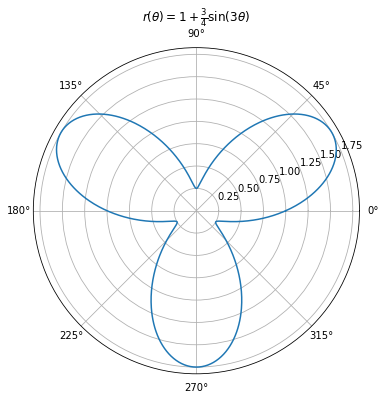

The computed area is: 4.0252


In [69]:
#your code
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the range of theta
theta = np.linspace(0, 2 * np.pi, 1000)

# Define the polar function
r = 1 + (3/4) * np.sin(3 * theta)

# Plotting
plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_title(r"$r(\theta) = 1 + \frac{3}{4}\sin(3\theta)$")
plt.show()

# Define the integrand for area computation
def integrand(theta):
    r = 1 + (3/4) * np.sin(3 * theta)
    return (r**2) / 2

# Compute the integral
area, error = quad(integrand, 0, 2 * np.pi)

print(f"The computed area is: {area:.4f}")

In [68]:
display_quiz(git_path+"question4.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Not a question but a suggestion.

Try solving any KVL or KCL problem using numpy.(Linear equation solution)

## Question-5

Use Newton's Gravitational Law along with Newton's 2nd law of motion to write the differential equation which earth will follow due to Sun's gravity (sun is fixed in it's place).

1. Now use Scipy to solve the equation. The constants needed must be imported from Astropy.
2. Plot your solution , i.e., x-y plot.

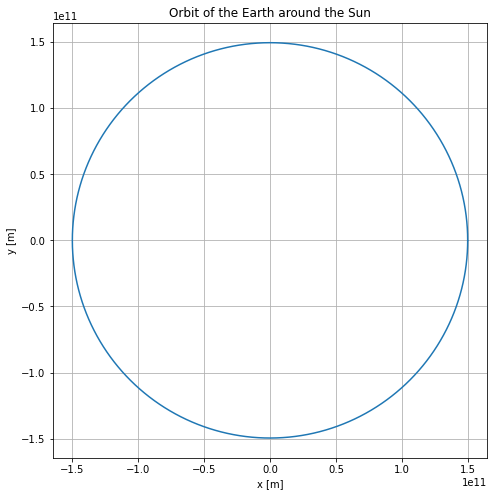

In [73]:
#solution
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from astropy.constants import G, M_sun

# Constants
G = G.value  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = M_sun.value  # Mass of the Sun in kg

# Differential equations
def equations(t, y):
    x, vx, y, vy = y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_sun * x / r**3
    ay = -G * M_sun * y / r**3
    return [vx, ax, vy, ay]

# Initial conditions: position (x0, y0) and velocity (vx0, vy0)
x0 = 1.496e11  # 1 AU in meters
y0 = 0
vx0 = 0
vy0 = 29783  # Average orbital speed of Earth in m/s

# Initial state vector
y0 = [x0, vx0, y0, vy0]

# Time span for one year
t_span = (0, 3.154e7)  # seconds in one year
t_eval = np.linspace(0, 3.154e7, 1000)  # 1000 points within one year

# Solve the differential equations
sol = solve_ivp(equations, t_span, y0, t_eval=t_eval, rtol=1e-9, atol=1e-9)

# Extract the solution
x = sol.y[0]
y = sol.y[2]

# Plotting the solution
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Orbit of the Earth around the Sun')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Question-6

**NASA Cosmic Background Explorer** (COBE) satellite carried an instrument, **FIRAS** (Far-Infrared Absolute Spectrophotometer) to measure the cosmic microwave background (CMB) radiation, which was confirmed to be distributed according to a black-body curve in accordance with the big bang theory:
$$ I(\nu, T) = \frac{2 h \nu^3 c^2}{\exp(\frac{hc\nu}{k_{b}T})-1}$$
where where the radiation frequency is expressed in wavenumbers, $cm^{-1}$, and the speed of light, c is taken to be in $cm-s^{-1}$.

The data file is cmb_data.txt, which contains measured $I(\nu)$ based on the FIRAS observations. Use scipy `curve_fit` to determine $T$, i.e., the Temperature parameter, along with error.

Note: In the file $I$ is in $erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$. Take the estimated $\sigma$ error in the measurement to be $2\times 10^{-6}$$erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$.

/Users/mehmetburakerkan/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitted Temperature: 2.7000 K
Temperature Error: ±inf K


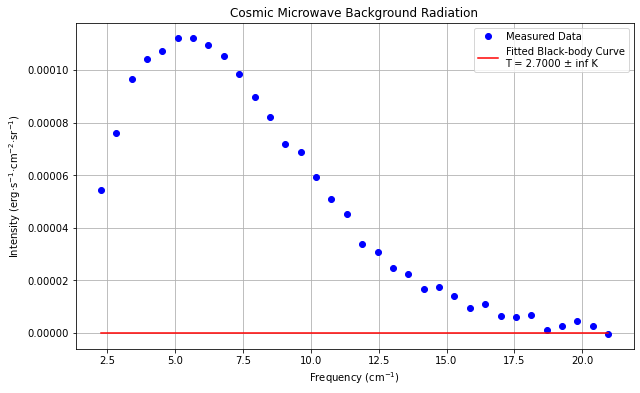

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Constants
h = 6.62607015e-27  # Planck's constant in erg·s
c = 2.99792458e10  # Speed of light in cm/s
k_b = 1.380649e-16  # Boltzmann constant in erg/K

# Load the data
data = np.loadtxt('cmb_data.txt')
nu = data[:, 0]  # Frequency in cm^-1
I_measured = data[:, 1]  # Measured intensity in erg·s^-1·cm^-2·sr^-1

# Error in the measurements
sigma = 2e-6  # erg·s^-1·cm^-2·sr^-1
sigma_array = np.full_like(I_measured, sigma)

# Define the black-body curve function
def black_body(nu, T):
    return (2 * h * nu**3 / c**2) / (np.exp(h * nu / (k_b * T)) - 1)

# Initial guess for the temperature
T_initial = 2.7  # in Kelvin

# Perform the curve fitting
popt, pcov = curve_fit(black_body, nu, I_measured, p0=T_initial, sigma=sigma_array)
T_fit = popt[0]
T_error = np.sqrt(np.diag(pcov))[0]

# Print the results
print(f"Fitted Temperature: {T_fit:.4f} K")
print(f"Temperature Error: ±{T_error:.4f} K")

# Plot the results
nu_fit = np.linspace(min(nu), max(nu), 500)
I_fit = black_body(nu_fit, T_fit)

plt.figure(figsize=(10, 6))
plt.plot(nu, I_measured, 'bo', label='Measured Data')
plt.plot(nu_fit, I_fit, 'r-', label=f'Fitted Black-body Curve\nT = {T_fit:.4f} ± {T_error:.4f} K')
plt.xlabel('Frequency (cm$^{-1}$)')
plt.ylabel('Intensity (erg·s$^{-1}$·cm$^{-2}$·sr$^{-1}$)')
plt.title('Cosmic Microwave Background Radiation')
plt.legend()
plt.grid(True)
plt.show()


In [75]:
display_quiz(git_path+"question6.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-7

Calculate the rest mass energy of a Proton in both joule and MeV.

If you want to get the list of constants present in AstroPy. Check the bottom of this link:https://docs.astropy.org/en/stable/constants/index.html

In [82]:
#solution
import numpy as np

# Constants
m_proton = 1.6726219e-27  # kg
c = 2.99792458e8  # m/s
joules_to_mev = 6.242e12  # conversion factor from joules to MeV

# Calculate rest mass energy in joules
E_joules = m_proton * c**2

# Convert the energy to MeV
E_mev = E_joules * joules_to_mev

E_joules, E_mev


(1.5032775946936155e-10, 938.3458746077548)

In [83]:
display_quiz(git_path+"question7.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-8

### Theory needed for problem-8

**Diurnal motion** is an astronomical term referring to the apparent motion of celestial objects (e.g. the Sun and stars) around Earth, or more precisely around the two celestial poles, over the course of one day.

It is caused by Earth's rotation around its axis, so almost every star appears to follow a circular arc path, called the diurnal circle,often depicted in star trail photography.

So, From the viewpoint of an observer on Earth, the apparent motion of an object on the celestrial sphere follows an arc above the horizon, which is called **diurnal arc**.

![Diurnal arc](https://webapps-cdn.esri.com/CDN/gis-dictionary/Media/diurnal-arc.gif)

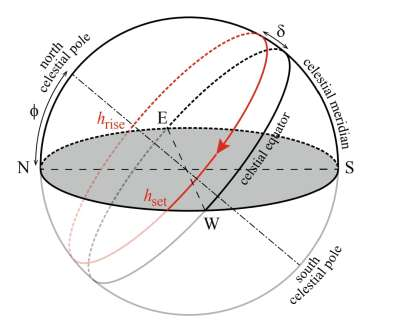

Here, Diurnal Arc of a Star moving around the celestrial sphere(red line) in the horizontal system of an observer at lattitude $\phi$. Since, the equatorial plane is inclined by the angle $90^{\circ} - \phi$ against the horizontal plane, the upper culmination of the star at the meridian is given by $a_{max} = 90^{\circ} - \phi + \delta$, where $\delta$ is the declination. The star **rises** at hour angle $h_{rise}$, reaches it's highest altitude when it crosses the meridian at $h=0$ and sets at the horizon at $h_{set} = -h_{rise}$. The value can be given by,
$$ \cos(h_{rise}) = -\tan(\delta) \tan(\phi) $$

**Sidereal Time** is the time for which the star is visible on sky. It is given by $T = 2h_{set}$.

Let's see an example for our Mercury.

In [20]:
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u
HG = SkyCoord.from_name('Mercury')
print(HG)
del_hg = HG.dec
print(del_hg)
obs = EarthLocation(lon=88*u.deg + 22*u.arcmin+49*u.arcsec,
                    lat=22*u.deg + 29*u.arcmin+28.3*u.arcsec)
phi = obs.lat
print(phi)

<SkyCoord (ICRS): (ra, dec) in deg
    (3.40722956, 15.74992254)>
15d44m59.72113805s
22d29m28.3s


In [21]:
#Now, calculate h
import math as m
h = m.acos(-m.tan(del_hg.radian)*m.tan(phi.radian))
print("h = ",h)
T = (m.degrees(2*h)/360)*u.day #conversion between sidereal and solar day
T_in_h = T.to(u.h)
print("T = ",T_in_h)

h =  1.687832250213155
T =  12.89408859510434 h


If Sun was not there, we could have been able to see mercuary for 12.88 hours!!.

**Problem-8**: Find how long the star `Betelgeuse` is present on sky from my location (Jadavpur, Kolkata, India).

In [ ]:
#trying

In [22]:
#Solution

In [23]:
display_quiz(git_path+"question8.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-9

The **Declination** of sun $\delta_s$ is given by,
$$ \delta_s = -\arcsin\Bigg(\sin(\epsilon_0)\cos\Big(\frac{360}{365.24}(N+10)\Big)\Bigg)$$
where $\epsilon_0 = 23.44^{\circ}$ and $N$ is the difference in days starting from 1st january.

Make a plot of how the length of day changes over the year in your location.

## Question-10

Now, let's play with some spectra. The spectra, we are going to use, was obtained at the 2.5m INT telescope and cover the range 3525-7500 Å (Sánchez-Blázquez et al. 2006) at 2.5 Å (FWHM) spectral resolution (Falcón-Barroso et al. 2011).

Plot the spectra from the fit file.

### Hints
<details>
<summary>How to get the wavelength?</summary>
CRPIX1  =                 1.00
    
CRVAL1  =            3500.0000 / central wavelength of first pixel
    
CDELT1  =             0.900000 / linear dispersion (Angstrom/pixel)
    
We have to use this three.
    
```import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

hdul = fits.open('name_of_file.fits')
data = hdul[0].data
h1 = hdul[0].header
obj_name = h1.get('OBJECT', 'Unknown')

flux = data[0]#your y
w = WCS(h1, naxis=1, relax=False, fix=False)
wv_am = w.wcs_pix2world(np.arange(len(flux)), 0)[0]#your x
```
</details>

In [24]:
#Solution

https://classic.sdss.org/dr6/algorithms/linestable.html
This link contains wavelengths and their corresponding element. Check from here.

In [25]:
display_quiz(git_path+"question10.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Hope.... you guys enjoyed the assignment.